WEB SCRAPING THE REVIEWS OF A HOME LOANS COMPANY FROM CONSUMER AFFAIRS AND PERFORMING SENTIMENT ANALYSIS

In [2]:
#importing libraries and providing base url

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

base_url="https://www.consumeraffairs.com/finance/caliber-home-loans.html"

In [4]:
all_pages_reviews=[]
all_pages_date=[]
all_pages_ratings=[]

In [5]:
#creating a function that scrapes relevant information

In [6]:
def scraper():
    for i in range(1,20):
        pagewise_reviews=[]
        pagewise_date=[]
        pagewise_rating=[]
        query_parameter="?page="+str(i)+"#scroll_to_reviews=true"
        url = base_url+query_parameter
        response=requests.get(url)
        soup=bs(response.content,'html.parser')
        rev_div = soup.findAll("div",attrs={"class","rvw-bd"})
        rev_date= soup.findAll("span",attrs={"class","ca-txt-cpt"})
        for date in rev_date:
            text= date.text
            pagewise_date.append(text)

        rev_rating = soup.findAll("div",attrs={"class","rvw__hdr-stat"})
        for rating in rev_rating:
            children=rating.findChildren("img", recursive=False)
            for child in children:
                text = child.get('alt')
                pagewise_rating.append(text)
        
        for j in range(len(rev_div)):
            pagewise_reviews.append(rev_div[j].find("p").text)

        
        for k in range(len(pagewise_reviews)):
            all_pages_reviews.append(pagewise_reviews[k])
            all_pages_date.append(pagewise_date[k])
            all_pages_ratings.append(pagewise_rating[k])
    
    
    return (all_pages_reviews, all_pages_date, all_pages_ratings)


In [7]:
#initializing function and creating data frame.

In [8]:
result=scraper()
print(len(result[0]))
#i = range(1, len(result[0])+1)
reviews_df = pd.DataFrame({'date':result[1],'review':result[0], 'rating': result[2]})

550


In [9]:
#Checking the top 10 rows of the dataframe 

In [10]:
reviews_df.head(10)

,date,review,rating
0,"Original review: Oct. 14, 2022",I am a real estate professional in Florida. I ...,Rated with 1 star
1,"Original review: Oct. 7, 2022",Derek ** has been great. Usually available but...,Rated with 5 stars
2,"Original review: Aug. 6, 2022","!!!No communication, raises mortgage payment d...",Rated with 1 star
3,"Original review: Aug. 4, 2022",Servicing the loan I had no complaints until I...,Rated with 1 star
4,"Original review: July 6, 2022",My experience with this company was a nightmar...,Rated with 1 star
5,"Original review: June 4, 2022",I don't recommend this company at all. Period....,Rated with 1 star
6,"Original review: May 18, 2022",Back in January of 2022 the processing departm...,Rated with 1 star
7,"Original review: May 5, 2022",Updated on 05/15/2022: I wrote complaint about...,Rated with 1 star
8,"Original review: May 5, 2022",Most times when I tried to pay my monthly paym...,Rated with 1 star
9,"Original review: March 7, 2022",Caliber bought out our loan from the original ...,Rated with 2 stars


In [11]:
#Saving data to a file (tab delimited)

In [12]:
reviews_df.to_csv('reviews.txt', sep='t')

DATA CLEANING & MANIPULATION

In [13]:
#Data Cleaning
#splitting columns 
#converting data types

In [14]:
r_df1=reviews_df.copy(deep=True)
r_df1['date']= reviews_df['date'].str.extract('([A-z]*.\s[0-9]*,\s[0-9]*)', expand=True)
r_df1['rating']= reviews_df['rating'].str.extract('([0-9])', expand=True)
r_df1['rating']=r_df1['rating'].astype(str).astype(int)
r_df1['date']=r_df1[['date']].apply(pd.to_datetime)


In [15]:
#Checking the data types
r_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    550 non-null    datetime64[ns]
 1   review  550 non-null    object        
 2   rating  550 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 10.9+ KB


In [16]:
#checking dataframe
r_df1.head(10)

,date,review,rating
0,2022-10-14,I am a real estate professional in Florida. I ...,1
1,2022-10-07,Derek ** has been great. Usually available but...,5
2,2022-08-06,"!!!No communication, raises mortgage payment d...",1
3,2022-08-04,Servicing the loan I had no complaints until I...,1
4,2022-07-06,My experience with this company was a nightmar...,1
5,2022-06-04,I don't recommend this company at all. Period....,1
6,2022-05-18,Back in January of 2022 the processing departm...,1
7,2022-05-05,Updated on 05/15/2022: I wrote complaint about...,1
8,2022-05-05,Most times when I tried to pay my monthly paym...,1
9,2022-03-07,Caliber bought out our loan from the original ...,2


SENTIMENT ANALYSIS

In [17]:
#Now we will do Sentiment Analysis
#lets categorize the reviews into sentiment

def sentiment_category (rating):
    if rating==1 or rating==2 or rating==3:
        return 0 #negative sentiment
    else:
        return 1 #positive sentiment
    


r_df1['sentiment'] = r_df1['rating'].apply(sentiment_category)


<AxesSubplot:ylabel='sentiment'>

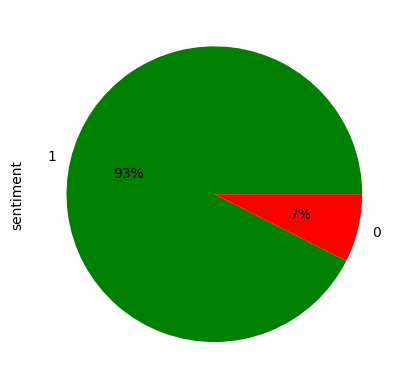

In [18]:
#visualizing the frequency

r_df1.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red"])

In [117]:
#majority of reviews are positive and we have an imbalanced data set. 

In [19]:
#now we have target variable
#let's preprocess review column before supplying it to the model

#importing all necessary packages

#pip install --upgrade scikit-learn
import matplotlib.pyplot as plt
import os
import nltk
#nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay




TEXT PREPROCESSING

In [20]:
#convert to lowercase
r_df1['review'] = r_df1['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [21]:
#confirming
r_df1['review'][2]

'!!!no communication, raises mortgage payment due to “escrow shortage”, paid it off over the last year, payment stays the same despite the payments being done. i call customer service to figure out why, they say it’s cause i need to have them do a new escrow analysis, despite the fact the agreement was for a 12 month period and they told me nothing about needing to do something on my end when i agreed to the extra payment for the 12 months. so i say do the escrow analysis and ask to speak to a manager/supervisor to go over this and they put in a note for them to call me back. it’s been two weeks and no call back yet despite me trying to call them twice in that time and each time no one being “available” but they’ll add to the note on my account. now i check and they finished the escrow analysis and it raised my payment again… what in the actual ** is going on and why can’t i get some or to talk to me?!'

In [22]:
#removing digits
patterndigits = '\\b[0-9]+\\b'
r_df1['review'] = r_df1['review'].str.replace(patterndigits,'')


#removing punctuation
patternpunc = '[^\w\s]'
r_df1['review'] = r_df1['review'].str.replace(patternpunc,'')

C:\Users\rithi\AppData\Local\Temp\ipykernel_20420\1867342974.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  r_df1['review'] = r_df1['review'].str.replace(patterndigits,'')
C:\Users\rithi\AppData\Local\Temp\ipykernel_20420\1867342974.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  r_df1['review'] = r_df1['review'].str.replace(patternpunc,'')


In [23]:
#confirming
r_df1['review'][2]

'no communication raises mortgage payment due to escrow shortage paid it off over the last year payment stays the same despite the payments being done i call customer service to figure out why they say its cause i need to have them do a new escrow analysis despite the fact the agreement was for a  month period and they told me nothing about needing to do something on my end when i agreed to the extra payment for the  months so i say do the escrow analysis and ask to speak to a managersupervisor to go over this and they put in a note for them to call me back its been two weeks and no call back yet despite me trying to call them twice in that time and each time no one being available but theyll add to the note on my account now i check and they finished the escrow analysis and it raised my payment again what in the actual  is going on and why cant i get some or to talk to me'

In [24]:
#removing stop words

stop = stopwords.words('english')

r_df1['review'] = r_df1['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [25]:
#stem the words
porstem = PorterStemmer()

r_df1['review'] = r_df1['review'].apply(lambda x: " ".join([porstem.stem(word) for word in x.split()]))

In [26]:
#converting into TF-IDF matrix
tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(r_df1['review'])

In [27]:
#performing train_test_split
y = r_df1['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
#fitting into model (Logistic Regression)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [29]:
#checking accuracy
accuracy_score(preds,y_test)

0.9347826086956522

In [30]:
cm = confusion_matrix(y_test, preds, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

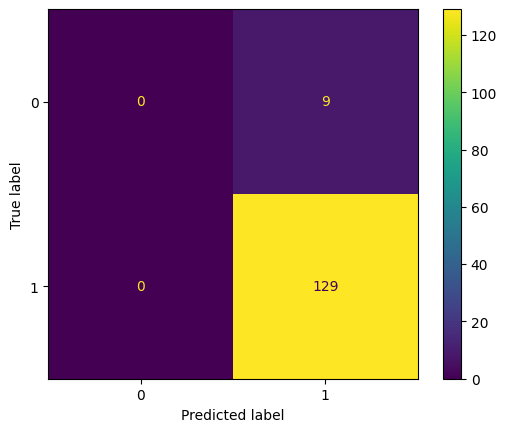

In [31]:
disp.plot()
plt.show()

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.93      1.00      0.97       129

    accuracy                           0.93       138
   macro avg       0.47      0.50      0.48       138
weighted avg       0.87      0.93      0.90       138



c:\Users\rithi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rithi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rithi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

As Data is imbalanced the model is not able to predict the right values for minority class. In order to solve this problem let's use SMOTE to over sample the minority class synthetically.

In [33]:
#importing SMOTE
from imblearn.over_sampling import SMOTE


In [34]:
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [35]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.97      0.98      0.98       129

    accuracy                           0.96       138
   macro avg       0.84      0.77      0.80       138
weighted avg       0.95      0.96      0.95       138



In [36]:
cm1 = confusion_matrix(y_test, predictions, labels=lr1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=lr1.classes_)

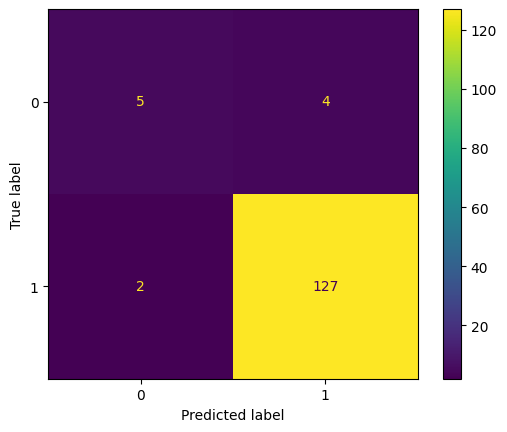

In [37]:
disp.plot()
plt.show()

In [38]:
accuracy_score(predictions,y_test)

0.9565217391304348

The accuracy improved and notice that recall of minority class also improved.

EXTRA: In order to see if there is a better ratio of undersampling and over sampling technique, We can use the following code.

In [138]:
# values to evaluate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))




SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.972
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.972
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.972
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.973
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.971
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.970
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.971
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.972
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.970


SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.973 is the best ratio of sampling to improve the model results.

References:
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/